In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.__version__

'1.3.4'

In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv",index_col=0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.drop(columns='Unnamed: 32',inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [8]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

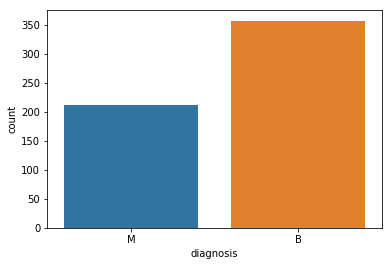

In [10]:
sns.countplot(x='diagnosis',data=data)

In [11]:
data.shape

(569, 31)

## Using SelectKBest feature Selection Method

#### SelectKBest uses f_classif function to find  best feature, where f_classif uses ANOVA test.

In [12]:
from sklearn.feature_selection import SelectKBest,f_classif

In [13]:
data.diagnosis=data.diagnosis.replace(['B','M'],[0,1])

In [14]:
data.diagnosis.unique()

array([1, 0], dtype=int64)

In [15]:
X=data.drop("diagnosis",axis=1)
Y=data.diagnosis

In [16]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1]:
from sklearn.feature_selection import SelectKBest,f_classif
best_feature=SelectKBest(score_func=f_classif,k=17)
fit=best_feature.fit(X,Y)
df_score=pd.DataFrame(fit.scores_,columns=['Feature_score'])
df_columns=pd.DataFrame(X.columns,columns=['Feature_Name'])
feature_score=pd.concat([df_columns,df_score],axis=1)


NameError: name 'X' is not defined

In [ ]:
feature_score.dtypes

In [19]:
top=feature_score.nlargest(17,'Feature_score')

In [20]:
"""
Export feature_score to .csv file for later use
df_backup=feature_score.nlargest(17,'Feature_score')
df_backup.to_csv("SelectedFeature.csv",index=False)
"""

'\nExport feature_score to .csv file for later use\ndf_backup=feature_score.nlargest(17,\'Feature_score\')\ndf_backup.to_csv("SelectedFeature.csv",index=False)\n'

In [21]:
colName=top.Feature_Name.tolist()

In [22]:
newX=data[colName]
newX.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,0.27760,0.6656,1.0950,8.589,153.40,17.33,0.1622
842517,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,0.07864,0.1866,0.5435,3.398,74.08,23.41,0.1238
84300903,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,0.15990,0.4245,0.7456,4.585,94.03,25.53,0.1444
84348301,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,0.28390,0.8663,0.4956,3.445,27.23,26.50,0.2098
84358402,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,0.13280,0.2050,0.7572,5.438,94.44,16.67,0.1374


In [23]:
newX.shape

(569, 17)

In [24]:
scaler=StandardScaler()
Scaler_X=scaler.fit_transform(newX)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(Scaler_X,Y,test_size=0.25,random_state=355)
from time import time
knn=KNeighborsClassifier()
start=time()
knn.fit(x_train,y_train)
print("Training time comsumption:",time()-start)
start=time()
y_pred=knn.predict(x_test)
print("Testing time comsumption:",time()-start)

Training time comsumption: 0.11014795303344727
Testing time comsumption: 0.1150825023651123


In [26]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[91,  2],
       [ 4, 46]], dtype=int64)

In [27]:
print(classification_report(y_pred,y_test,digits=2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        95
           1       0.92      0.96      0.94        48

   micro avg       0.96      0.96      0.96       143
   macro avg       0.95      0.96      0.95       143
weighted avg       0.96      0.96      0.96       143



### Cross Validation

####        for Demo

In [28]:
from sklearn.model_selection import KFold,cross_val_score

In [29]:
K_f=KFold(n_splits=3,shuffle=True)

In [32]:
for train,test in K_f.split([0,1,2,3,4,5,6,7,8,9]):
    print("Train",train,"Test",test)

Train [1 3 4 6 7 9] Test [0 2 5 8]
Train [0 2 3 5 6 8 9] Test [1 4 7]
Train [0 1 2 4 5 7 8] Test [3 6 9]


In [33]:
cross_val_score(knn,Scaler_X,Y,cv=5)

array([0.96521739, 0.96521739, 0.97345133, 0.98230088, 0.96460177])

In [34]:
cross_val_score(knn,Scaler_X,Y,cv=5).mean()

0.9701577529819161

## Hyperparameter Tunning

### GridSearch CV

In [35]:
from sklearn.model_selection import GridSearchCV

In [55]:
params_grid={
    'algorithm':['kd_tree','brute'],
    'leaf_size':[10,11,14,15,18,20,25],
    'n_neighbors':[3,5,7,9,11,13]
}

In [56]:
gridCV=GridSearchCV(estimator=knn,param_grid=params_grid)

In [58]:
gridCV.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'algorithm': ['kd_tree', 'brute'], 'leaf_size': [10, 11, 14, 15, 18, 20, 25], 'n_neighbors': [3, 5, 7, 9, 11, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
gridCV.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 3}

In [60]:
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=10,n_neighbors=3)

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [62]:
y_pred=knn.predict(x_test)

In [63]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[91,  2],
       [ 4, 46]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

